In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Coffee Shop Sales.xlsx")

In [3]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [4]:
df.shape

(149116, 11)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df["store_id"].nunique()

3

In [7]:
df["store_location"].nunique()

3

In [8]:
df.drop("transaction_id",axis=1)

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...
149111,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [9]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [10]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [12]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [14]:
df['revenue'] = df['transaction_qty'] * df['unit_price'] 
revenue = df['revenue'].sum() 
avg_sales = df['revenue'].mean()

In [15]:
print(f"Revenue: {revenue}")
print(f"Average Sales per Transaction: {avg_sales}")

Revenue: 698812.3300000002
Average Sales per Transaction: 4.686367190643527


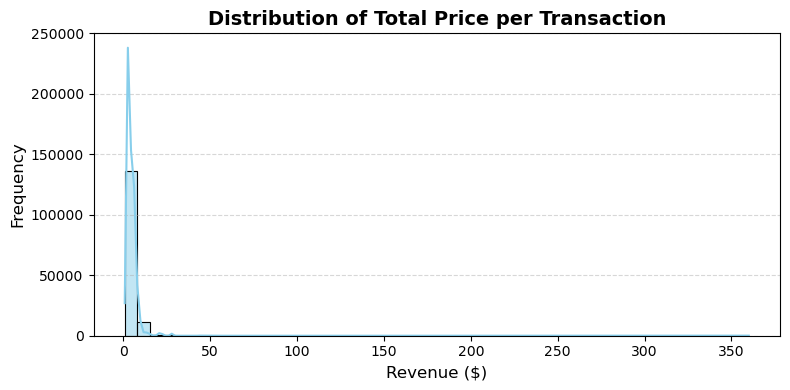

In [30]:
# Distribution of Total Price per Transaction
plt.figure(figsize=(8,4))
ax = sns.histplot(
    data=df,
    x='revenue',
    bins=50,
    kde=True,
    color='skyblue'
)
plt.title("Distribution of Total Price per Transaction", fontsize=14, fontweight='bold')
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


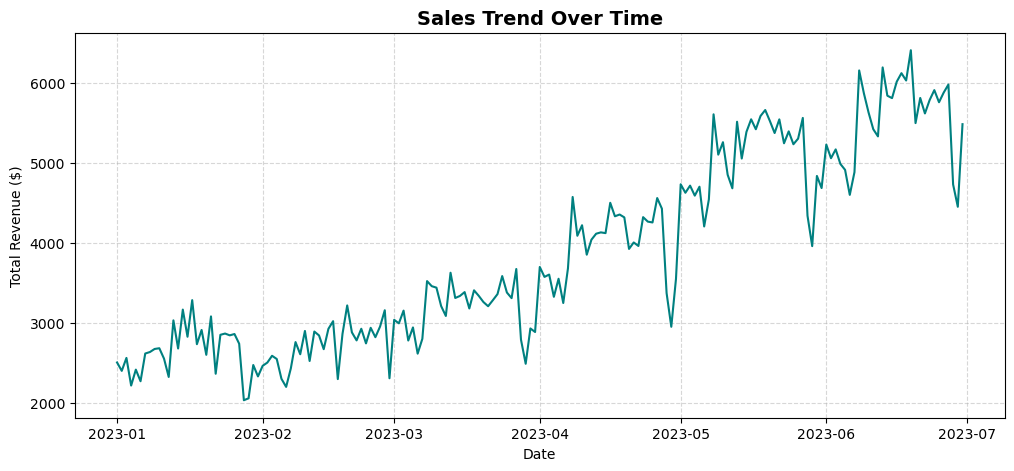

In [18]:
sales_trend = df.groupby('transaction_date')['revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(sales_trend['transaction_date'], sales_trend['revenue'], color='teal')
plt.title("Sales Trend Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

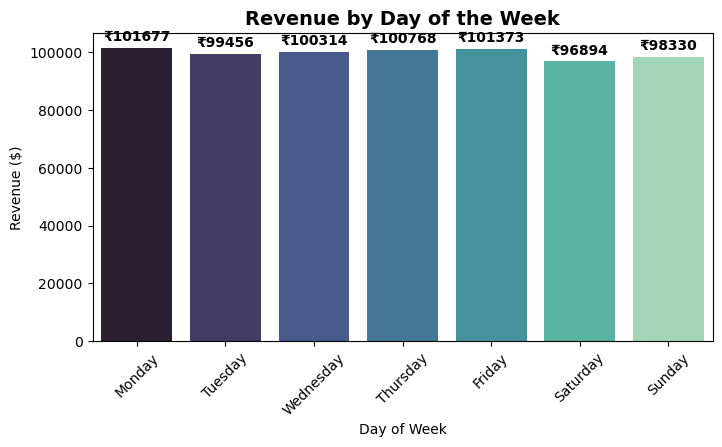

In [23]:
df['day_of_week'] = df['transaction_date'].dt.day_name()

busiest_days = df.groupby('day_of_week')['revenue'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=busiest_days,
    x='day_of_week',
    y='revenue',
    hue='day_of_week',   
    palette='mako',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, 
                 fmt='₹%.0f',         
                 label_type='edge', 
                 padding=3, 
                 fontsize=10, 
                 color='black', 
                 weight='bold')
plt.title("Revenue by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()


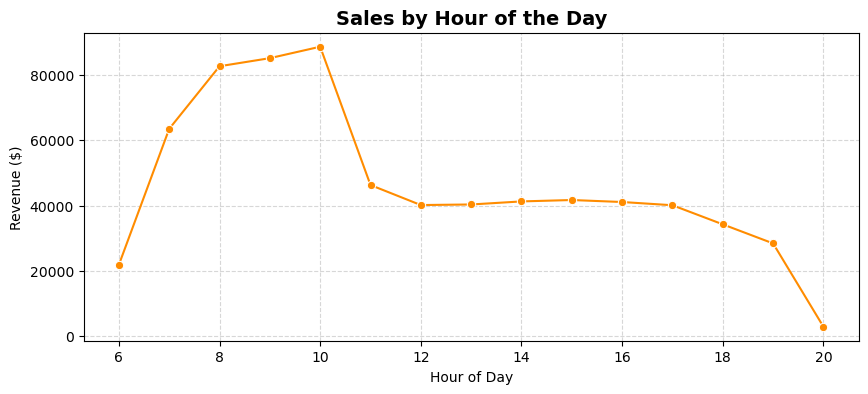

In [25]:
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').apply(lambda x: x.hour)
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_sales, x='hour', y='revenue', marker='o', color='darkorange')
plt.title("Sales by Hour of the Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Revenue ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

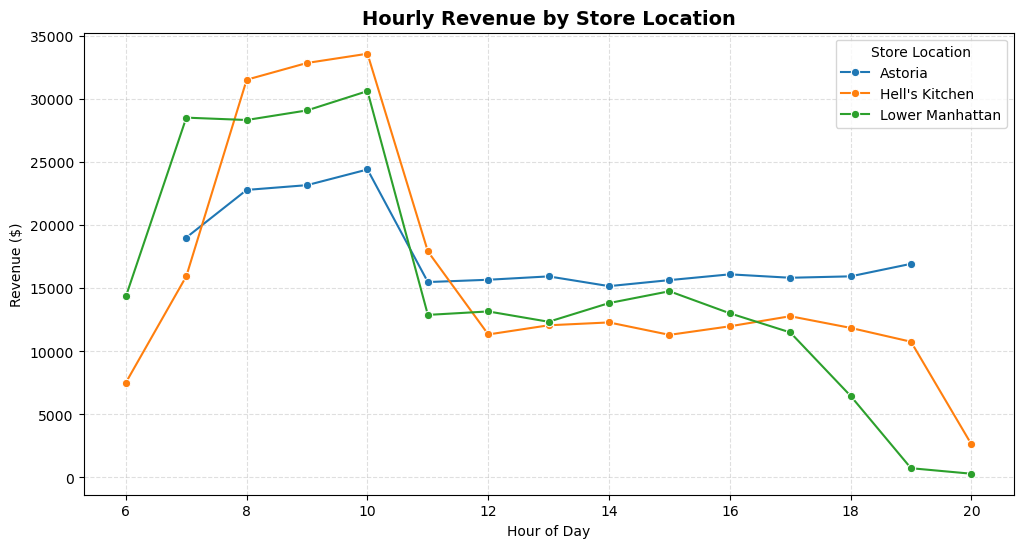

In [26]:
hourly_location = df.groupby(['store_location','hour'])['revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_location, x='hour', y='revenue', hue='store_location', marker='o')
plt.title("Hourly Revenue by Store Location", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Revenue ($)")
plt.legend(title='Store Location')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

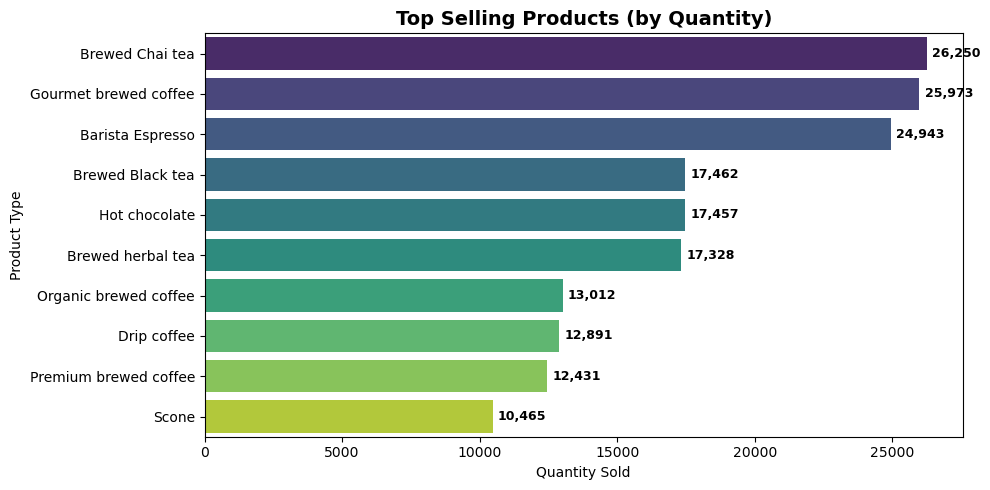

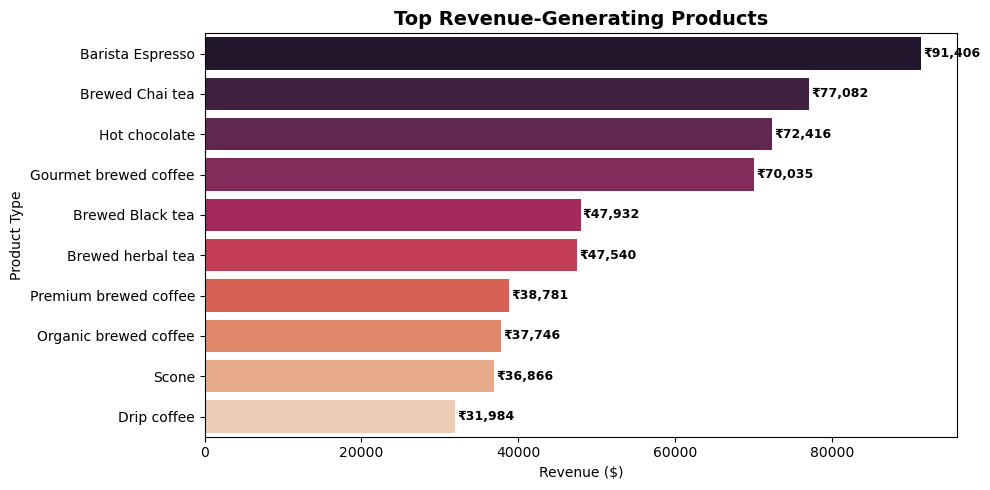

In [28]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=product_sales.head(10),
    x='total_qty',
    y='product_type',
    hue='product_type',        # added hue to remove warning
    palette='viridis',
    legend=False
)

# Add labels near each bar
for i, value in enumerate(product_sales.head(10)['total_qty']):
    plt.text(value + 200, i, f'{value:,}', va='center', fontsize=9, fontweight='bold')

plt.title("Top Selling Products (by Quantity)", fontsize=14, fontweight='bold')
plt.xlabel("Quantity Sold")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()


# --- Top Revenue-Generating Products ---
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=product_sales.sort_values(by='total_revenue', ascending=False).head(10),
    x='total_revenue',
    y='product_type',
    hue='product_type',        # added hue to silence warning
    palette='rocket',
    legend=False
)

# Add revenue labels
for i, value in enumerate(product_sales.sort_values(by='total_revenue', ascending=False).head(10)['total_revenue']):
    plt.text(value + 300, i, f'₹{value:,.0f}', va='center', fontsize=9, fontweight='bold')

plt.title("Top Revenue-Generating Products", fontsize=14, fontweight='bold')
plt.xlabel("Revenue ($)")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()

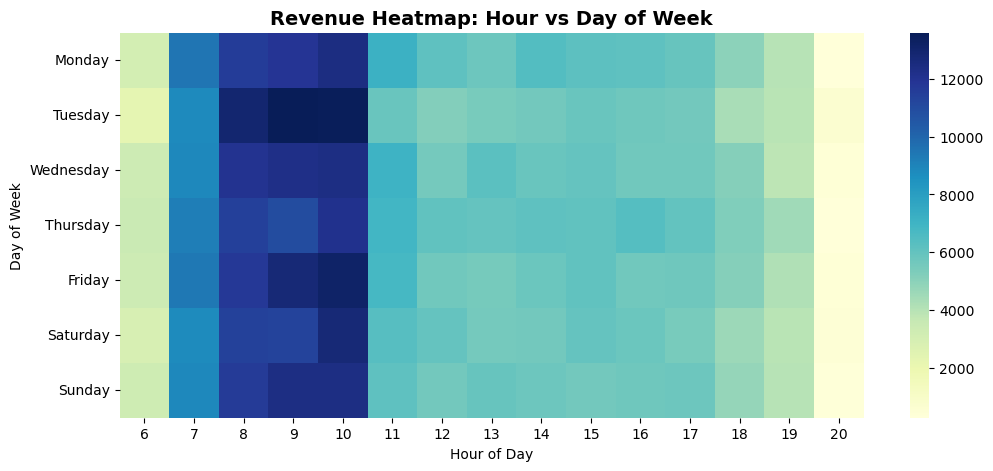

In [29]:
pivot = df.pivot_table(index='day_of_week', columns='hour', values='revenue', aggfunc='sum').fillna(0)
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Revenue Heatmap: Hour vs Day of Week", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# ☕ Coffee Shop EDA – Sales Insights

## **Sales Trend Over Time**

- **Observation:** Total revenue shows a **gradual upward trend** from January to June.  
- **Focus:** **Overall growth patterns** in sales over time.  
- **Insight:** The coffee shop is experiencing **steady revenue growth**, indicating **increasing customer demand** and **successful operations**.  
- **Notable Points:** Some **sharp dips** are visible, likely due to **holidays or special events affecting footfall**.  

## **Revenue by Day of the Week**

- **Observation:** Revenue varies across days of the week:  
  - **Friday:** ₹101,373 (**highest** revenue)  
  - **Saturday:** ₹96,894 (**lowest** revenue)  
- **Focus:** **Day-wise revenue trends** to optimize staffing and promotions.  
- **Insight:** **Weekdays, especially Friday, perform better** than weekends.  
- **Actionable Tip:** Consider **special promotions on lower-revenue days** (Saturday, Sunday) to **boost sales consistency**.  

## **Sales by Hour of the Day**

- **Observation:** Revenue peaks sharply between **8 AM to 10 AM**, with the highest sales around **10 AM**, followed by a **gradual decline** throughout the afternoon and evening.  
- **Focus:** Understanding **peak business hours** for effective resource allocation.  
- **Insight:** **Morning hours contribute the most to daily revenue**, likely due to high coffee and breakfast demand.  
- **Notable Points:** Revenue is lowest at **early morning (6 AM)** and **late evening (8 PM)**, indicating **limited customer activity** during these times.  

## **Distribution of Total Price per Transaction**

- **Observation:** Most transactions are **concentrated at lower price points**, with a **sharp frequency spike between $0–$20** and very few high-value transactions.  
- **Focus:** Analyzing **customer spending behavior** per transaction.  
- **Insight:** **High transaction volume at lower amounts** suggests frequent small orders, typical of coffee shop purchases.  
- **Notable Points:** Presence of **few outliers with higher transaction values**, possibly due to **group or bulk orders**.  

## **Hourly Revenue by Store Location**

- **Observation:** All three store locations follow a **similar morning peak trend**, with the **Hell's Kitchen** location showing the **highest revenue between 8 AM and 10 AM**.  
  - **Hell's Kitchen:** Strongest performance during peak hours.  
  - **Lower Manhattan:** Early rise but sharp drop after 10 AM.  
  - **Astoria:** More consistent revenue throughout the day.  
- **Focus:** Identifying **location-based sales patterns** to optimize scheduling and inventory.  
- **Insight:** Peak-hour dominance at **Hell’s Kitchen** can guide **staffing and supply allocation**. **Astoria’s** steady performance indicates **consistent customer traffic** beyond the morning rush.  
- **Notable Points:** **Lower Manhattan** shows a **sharp revenue decline post-10 AM**, suggesting a **time-bound commuter customer base**.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_absolute_error, mean_squared_error

In [33]:
# Encode categorical variables
encoder = LabelEncoder()
df['product_type'] = encoder.fit_transform(df['product_type'])
df['store_location'] = encoder.fit_transform(df['store_location'])
df['day_of_week'] = encoder.fit_transform(df['day_of_week'])

# Feature and target for classification & regression
X = df[['product_type', 'store_location', 'day_of_week', 'transaction_qty']]
y_class = (df['revenue'] > df['revenue'].mean()).astype(int)   # classification target: 1 = high revenue
y_reg = df['revenue']                                           # regression target

In [34]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [35]:
models_class = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models_class.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    print(f"\n🔹 {name} Classification Report:")
    print(classification_report(y_test_c, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test_c, preds))
    print("Accuracy:", round(accuracy_score(y_test_c, preds), 3))


🔹 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18246
           1       0.91      0.97      0.94     11578

    accuracy                           0.95     29824
   macro avg       0.94      0.96      0.95     29824
weighted avg       0.95      0.95      0.95     29824

Confusion Matrix:
 [[17103  1143]
 [  313 11265]]
Accuracy: 0.951

🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18246
           1       0.91      0.97      0.94     11578

    accuracy                           0.95     29824
   macro avg       0.94      0.96      0.95     29824
weighted avg       0.95      0.95      0.95     29824

Confusion Matrix:
 [[17103  1143]
 [  313 11265]]
Accuracy: 0.951

🔹 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94  

In [36]:
models_reg = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

for name, model in models_reg.items():
    model.fit(X_train_r, y_train_r)
    preds = model.predict(X_test_r)
    print(f"\n🔹 {name} Regression Report:")
    print("R² Score:", round(r2_score(y_test_r, preds), 3))
    print("MAE:", round(mean_absolute_error(y_test_r, preds), 3))
    print("MSE:", round(mean_squared_error(y_test_r, preds), 3))


🔹 Decision Tree Regression Report:
R² Score: 0.896
MAE: 0.574
MSE: 0.952

🔹 Random Forest Regression Report:
R² Score: 0.896
MAE: 0.574
MSE: 0.947

🔹 Gradient Boosting Regression Report:
R² Score: 0.836
MAE: 0.66
MSE: 1.495

🔹 Linear Regression Regression Report:
R² Score: 0.153
MAE: 1.269
MSE: 7.742


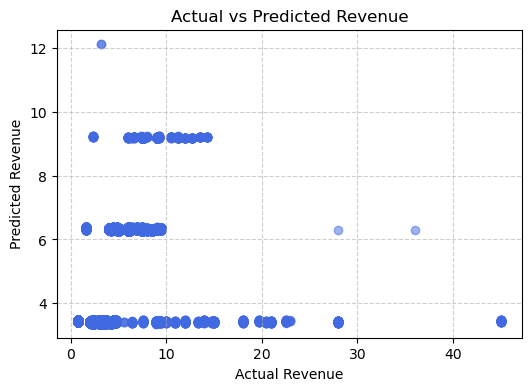

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(y_test_r, preds, alpha=0.5, color='royalblue')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ☕ Coffee Shop Sales Analysis – Model Recommendations

## Classification Models


- **General Sales Prediction**  
  - **Focus:** **F1 Score** (balances **Precision** & **Recall**)  
  - **Best Model:** **Random Forest Classifier**  
  - **Reason:** High **F1-score (~0.95)** and **accuracy (~95%)**, balanced for both classes.

- **Targeted Promotions** (avoiding false high-sale predictions)  
  - **Focus:** **Precision**  
  - **Best Model:** **Gradient Boosting Classifier**  
  - **Reason:** Higher **precision (~0.91 for high sales)** -> fewer **false positives**.

- **Capturing Peak Sales Days**  
  - **Focus:** **Recall**  
  - **Best Model:** **Decision Tree Classifier**  
  - **Reason:** Highest **recall (~0.97 for high-sales class)** -> captures most **actual high-sales events**.


## Regression Models

- **Accurate General Sales Forecasting**  
  - **Focus:** R² and Error Metrics (MAE, MSE)  
  - **Best Model:** **Random Forest Regression**  
  - **Reason:** **R² = 0.896**, **MAE = 0.574**, **MSE ~0.95** -> highly accurate.

- **Understanding Factors Driving Sales**  
  - **Focus:** Interpretability / Feature Importance  
  - **Best Model:** **Decision Tree Regression**  
  - **Reason:** Easy to **visualize which features** impact sales (day, promotions, weather, etc.).

- **Capturing Peak Sales Patterns**  
  - **Focus:** Complex Trend Learning  
  - **Best Model:** **Gradient Boosting Regression**  
  - **Reason:** Can capture **non-linear patterns**, but requires **hyperparameter tuning**.

- **Simple Trend Estimation / Baseline**  
  - **Focus:** Linear Trends  
  - **Model:** **Linear Regression**  
  - **Reason:** Low **R² (~0.153)** -> only for **rough trend estimation**.